In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
ceps = [input(f"Informe o {i+1}º CEP: ") for i in range(5)]

print("\n=== Resultados ===")

for cep in ceps:
    url = f"https://viacep.com.br/ws/{cep}/json/"
    try:
        r = requests.get(url, timeout=5)
        if r.status_code == 200:
            dados = r.json()
            if "erro" in dados:
                print(f"CEP inválido: {cep}\n")
            else:
                print(f"CEP: {dados.get('cep')}")
                print(f"Logradouro: {dados.get('logradouro')}")
                print(f"Complemento: {dados.get('complemento')}")
                print(f"Bairro: {dados.get('bairro')}")
                print(f"Localidade: {dados.get('localidade')}")
                print(f"UF: {dados.get('uf')}\n")
        else:
            print(f"Erro na requisição para o CEP {cep}.")
    except requests.RequestException as e:
        print(f"Erro de conexão: {e}")



=== Resultados ===
CEP: 02987-080
Logradouro: Rua Xavier das Conchas
Complemento: 
Bairro: Vila Santo Antônio
Localidade: São Paulo
UF: SP

CEP: 02987-070
Logradouro: Rua Campo da Aclamação
Complemento: 
Bairro: Parque Taipas
Localidade: São Paulo
UF: SP

CEP: 02987-060
Logradouro: Rua Barra da Buriquioca
Complemento: 
Bairro: Parque Taipas
Localidade: São Paulo
UF: SP

CEP: 02987-050
Logradouro: Rua Chafariz das Marrecas
Complemento: 
Bairro: Vila Santo Antônio
Localidade: São Paulo
UF: SP

CEP inválido: 02987040



In [2]:
url = 'https://viacep.com.br/ws/'
cep = '02987080'
formato = '/xml/'

r = requests.get(url + cep + formato)

if r.status_code == 200:
    print("\nXML:\n")
    print(r.text)
else:
    print("Não houve sucesso na requisição.")


XML:

<?xml version="1.0" encoding="UTF-8"?>
<xmlcep>
  <cep>02987-080</cep>
  <logradouro>Rua Xavier das Conchas</logradouro>
  <complemento></complemento>
  <unidade></unidade>
  <bairro>Vila Santo Antônio</bairro>
  <localidade>São Paulo</localidade>
  <uf>SP</uf>
  <estado>São Paulo</estado>
  <regiao>Sudeste</regiao>
  <ibge>3550308</ibge>
  <gia>1004</gia>
  <ddd>11</ddd>
  <siafi>7107</siafi>
</xmlcep>


In [3]:
uf = input("Informe a UF (ex: MG): ").strip()
cidade = input("Informe a cidade (ex: Belo Horizonte): ").strip()
rua = input("Informe o nome da rua (ex: Rua dos Aimores): ").strip()

url = f"https://viacep.com.br/ws/{uf}/{cidade}/{rua}/json/"
r = requests.get(url)

if r.status_code == 200:
    print("\nJSON:\n")
    print(r.json())
else:
    print("Não houve sucesso na requisição.")



JSON:

[{'cep': '02987-080', 'logradouro': 'Rua Xavier das Conchas', 'complemento': '', 'unidade': '', 'bairro': 'Vila Santo Antônio', 'localidade': 'São Paulo', 'uf': 'SP', 'estado': 'São Paulo', 'regiao': 'Sudeste', 'ibge': '3550308', 'gia': '1004', 'ddd': '11', 'siafi': '7107'}]


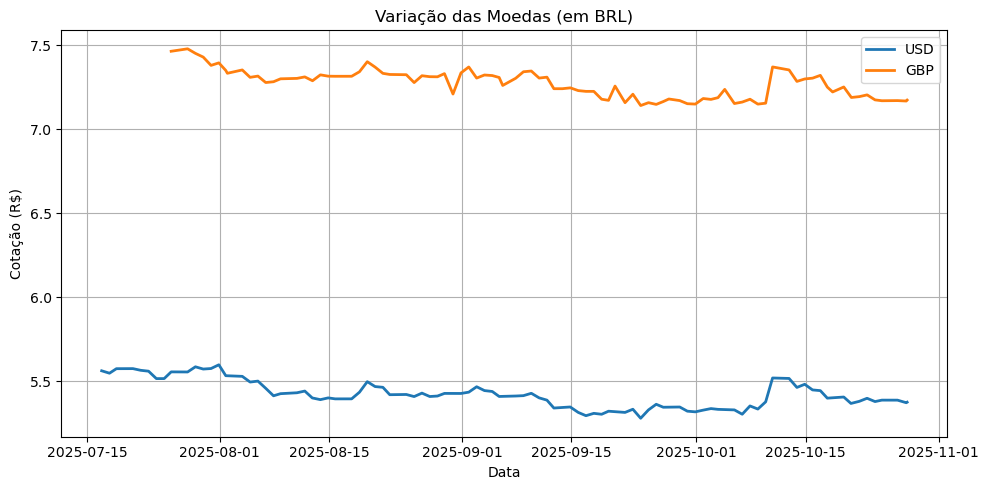

In [11]:
moeda1 = input("Informe o código da primeira moeda (ex: USD): ").upper()
moeda2 = input("Informe o código da segunda moeda (ex: EUR): ").upper()
dias = int(input("Informe a quantidade de dias: "))

url1 = f"https://economia.awesomeapi.com.br/json/daily/{moeda1}-BRL/{dias}"
url2 = f"https://economia.awesomeapi.com.br/json/daily/{moeda2}-BRL/{dias}"

r1 = requests.get(url1)
r2 = requests.get(url2)

if r1.status_code == 200 and r2.status_code == 200:
    df1 = pd.DataFrame(r1.json())
    df2 = pd.DataFrame(r2.json())

    df1["data"] = df1["timestamp"].astype(int).apply(lambda x: datetime.fromtimestamp(x))
    df1["valor"] = df1["bid"].astype(float)

    df2["data"] = df2["timestamp"].astype(int).apply(lambda x: datetime.fromtimestamp(x))
    df2["valor"] = df2["bid"].astype(float)

    plt.figure(figsize=(10, 5))
    plt.plot(df1["data"], df1["valor"], label=moeda1, linewidth=2)
    plt.plot(df2["data"], df2["valor"], label=moeda2, linewidth=2)
    plt.title("Variação das Moedas (em BRL)")
    plt.xlabel("Data")
    plt.ylabel("Cotação (R$)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Erro ao consultar uma ou ambas as moedas.")